# Análisis predictivo de series temporales

-----

## Modelos autorregresivos y autocorrelación parcial

### Introducción:

* En las clases anteriores introdujimos los conceptos de autocorrelación y correlación cruzada para analizar la relación entre una serie o series y sus versiones "laggeadas".

* Exploramos además cómo realizar regresiones lineales (con o sin lags) para explicar el comportamiento de una serie. Sirve para explicar tendencias, estacionalidad.

* Generalmente esto es *insuficiente* para explicar el comportamiento de una serie con dinámica interna.

* En general esto lo vimos como que "quedaba correlación" luego de los ajustes.

### Objetivos:

* Introducir la correlación como parte intrínseca de la serie. Hacer que los valores anteriores del proceso influyan directamente en el valor observado actual (autorregresivo, AR), y que valores anteriores del ruido influyan en el valor actual observado (media móvil, MA).

* Combinaciones de los dos anteriores da lugar a los modelos ARMA.

* Veremos cómo es posible:

  * Usar modelos ARMA para predecir valores futuros de una serie.
  * Ajustar los parámetros de un modelo ARMA a partir de observaciones.
  
* Si agregamos el caso no estacionario, veremos como *diferenciar* una serie puede producir estacionariedad. Esto da lugar a los modelos ARIMA (I=integrated).

### Definición:

Una *serie temporal* es una sucesión de variables aleatorias o *proceso estocástico* $x_0,x_1,x_2,\ldots$. La variable aleatoria $x_t$ denota el valor del proceso al tiempo $t$.

* Al proceso estocástico o serie temporal se lo denota por $\{x_t\}$.

* Típicamente (y para todo este curso) se consideran indexados por $t$ entero ($\ldots, -2, -1, 0, 1, 2, \ldots$).

* A los valores particulares que toma una serie temporal cuando la observamos se le denomina *realización* del proceso, y lo denotaremos por $x_t$, abusando un poco de la notación.

### Ruido blanco

__Definición:__ El caso más sencillo de serie temporal es un conjunto de variables aleatorias con la misma distribución y no correlacionadas. Si ${w_t}$ es una serie temporal en la cual las variables tienen media $E[w_t]=0$, varianza $Var(w_t) = \sigma_w^2 >0$ y la covarianza de $w_t$ y $w_s$ es $0$ se le denomina *ruido blanco*.  

__Definición:__ Si además las variables son independientes y con la misma distribución (iid), se le denomina ruido blanco independiente.

__Definición:__ En el caso que además la distribución de $w_t$ para cada $t$ sea Normal $N(0,\sigma_w^2)$ le llamamos *ruido blanco gaussianp*

In [1]:
install.packages("devtools")     # only need to do this once
devtools::install_github("nickpoison/astsa")
#install.packages("astsa")
library(astsa)
options(repr.plot.width=12, repr.plot.height=7) #ajusta tamaño de graficas


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'astsa' from a github remote, the SHA1 (69bb7253) has not changed since last install.
  Use `force = TRUE` to force installation



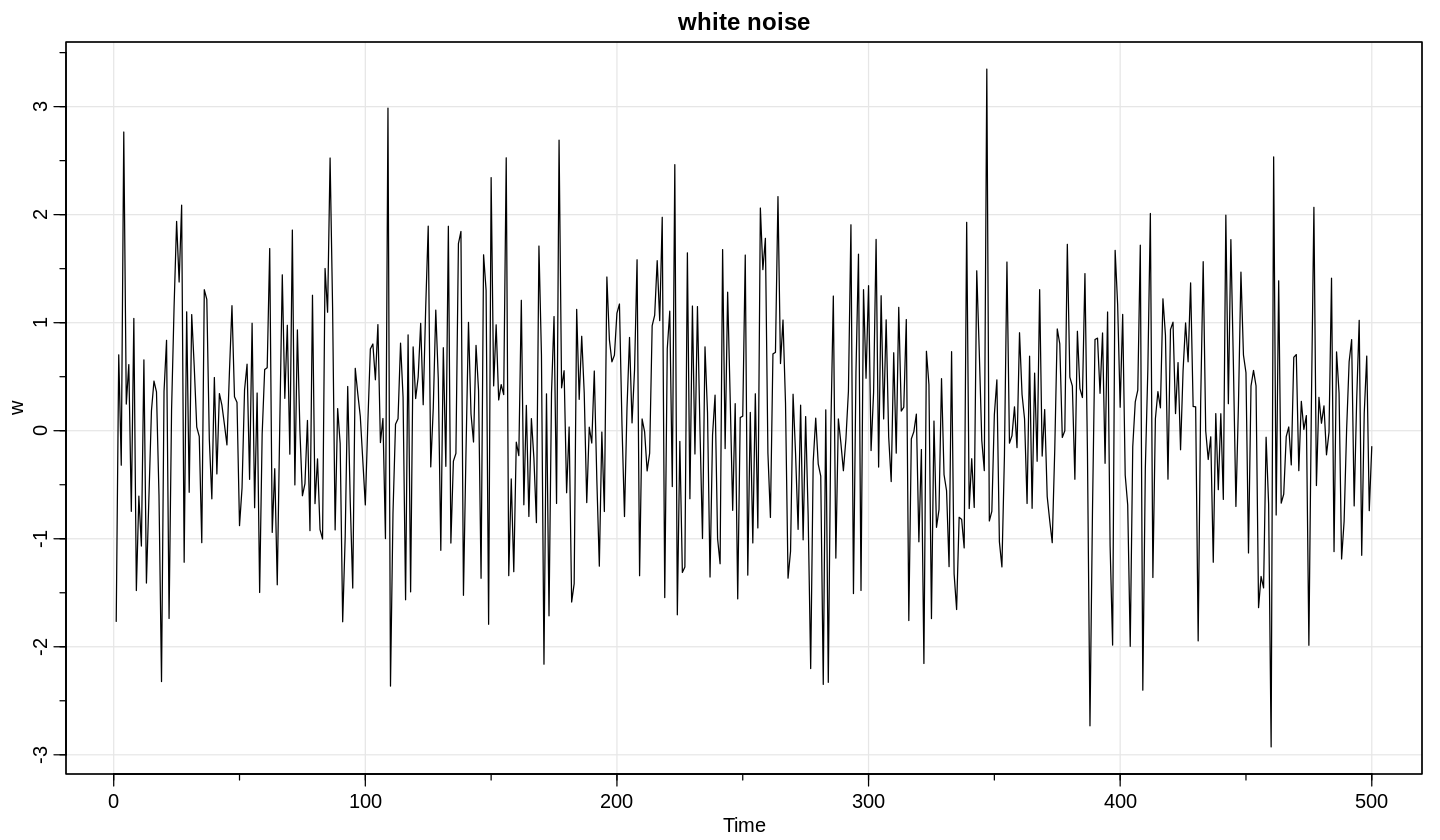

In [2]:
w = rnorm(500,0,1)  # 500 N(0,1) variates
tsplot(w, main="white noise")

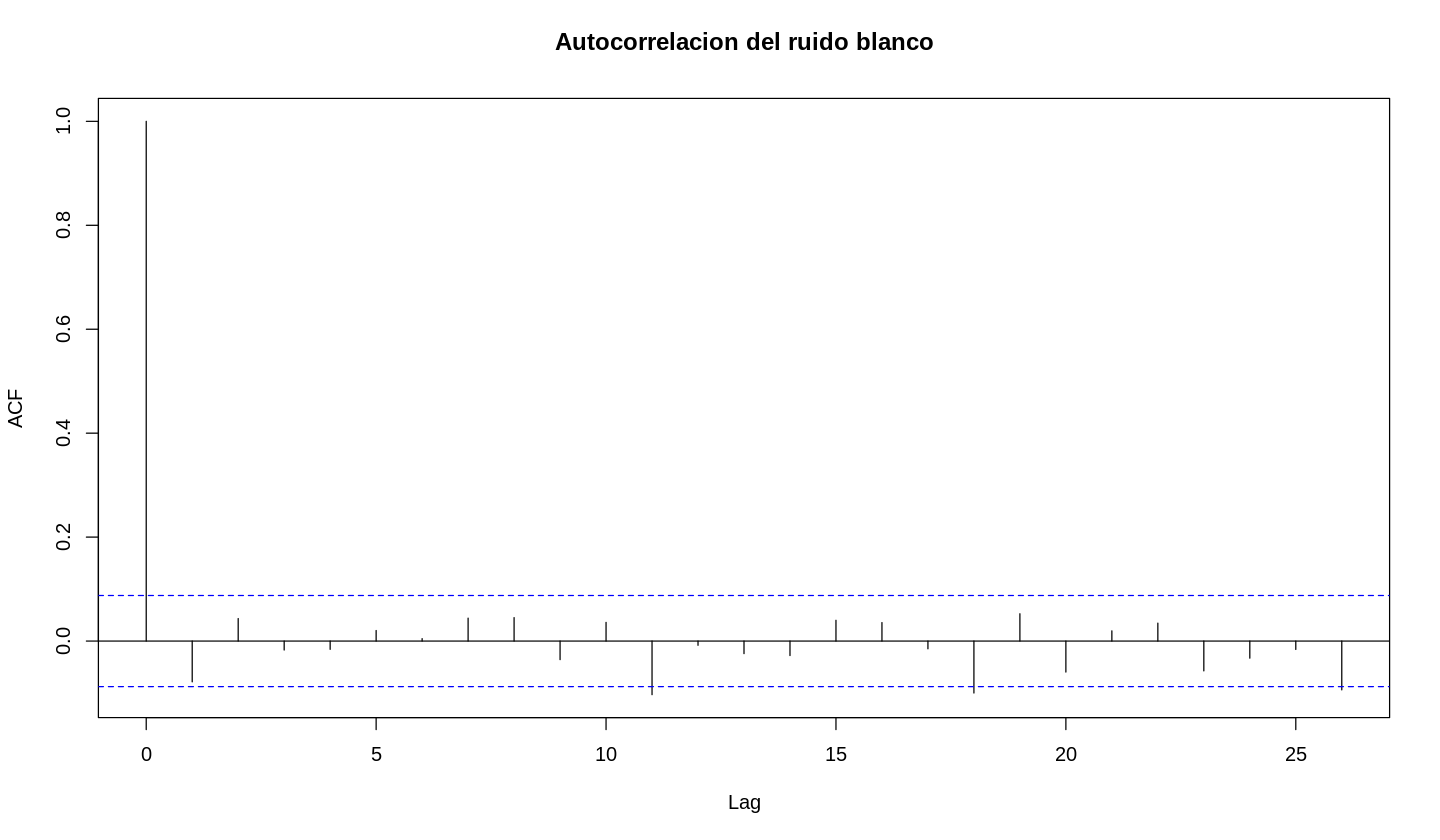

In [3]:
acf(w, main="Autocorrelacion del ruido blanco")

### Modelos autorregresivos

**Idea:** el valor del proceso en tiempo $t$ es una combinación lineal de los últimos $p$ valores de la serie, más una *innovación* o *ruido* que afecta solo al tiempo $t$.

> **Ejemplo:**
>
>Consideremos el proceso:
> $$x_t = x_{t-1} -0.9 x_{t-2} + w_t.$$
>
> Con $x_{0}$ y $x_{-1}$ dados (por ejemplo 0).

Este es un proceso *autorregresivo de orden 2*.

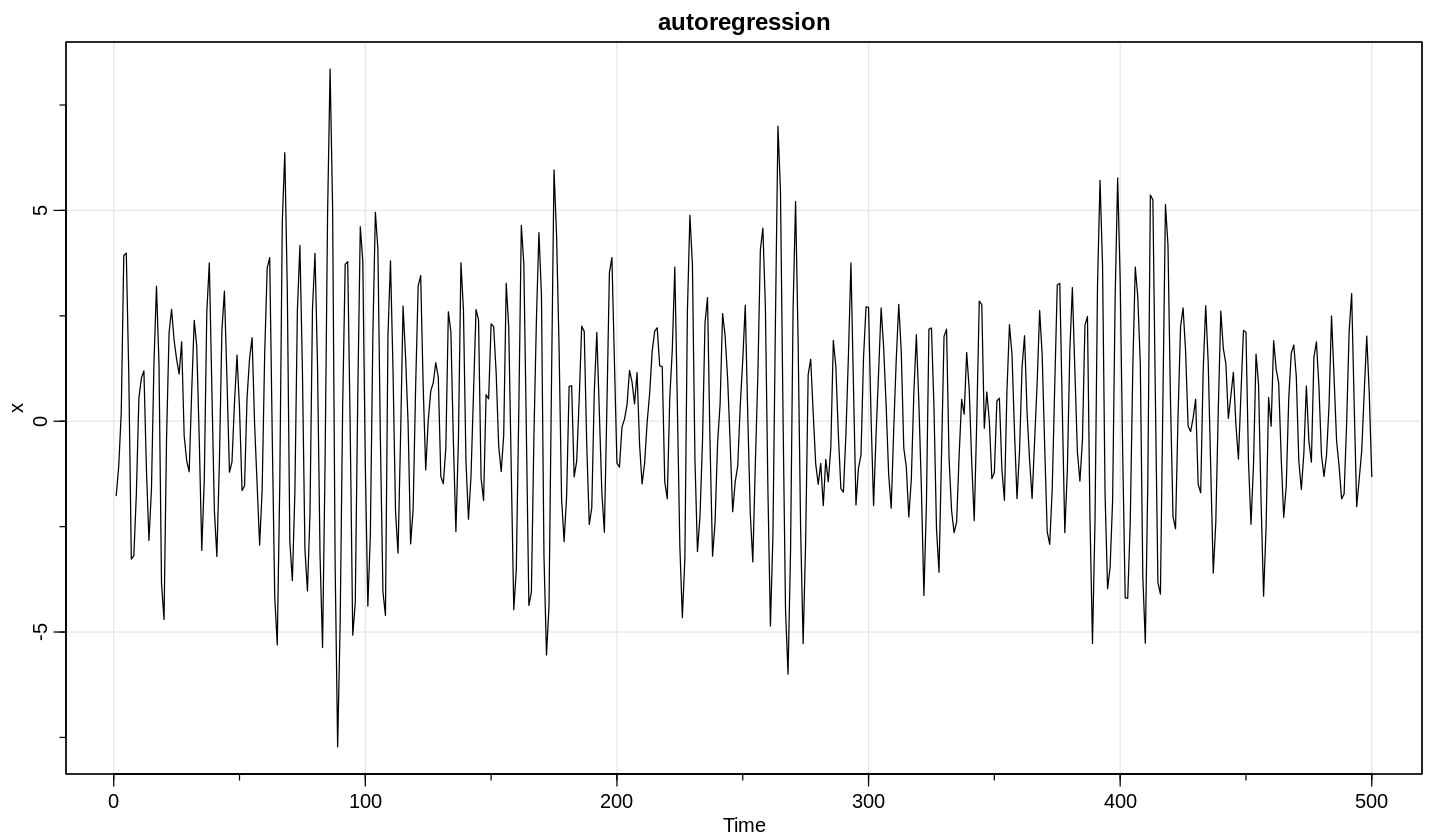

In [4]:
#esto se construye con el comando "filter" de R
x = filter(w, filter=c(1,-.9), method="recursive")
tsplot(x, main="autoregression")

### Autocorrelación del proceso:

Uno tiende a pensar que la autocorrelación del proceso solo tendrá valores significativos para los 2 anteriores. **FALSO**

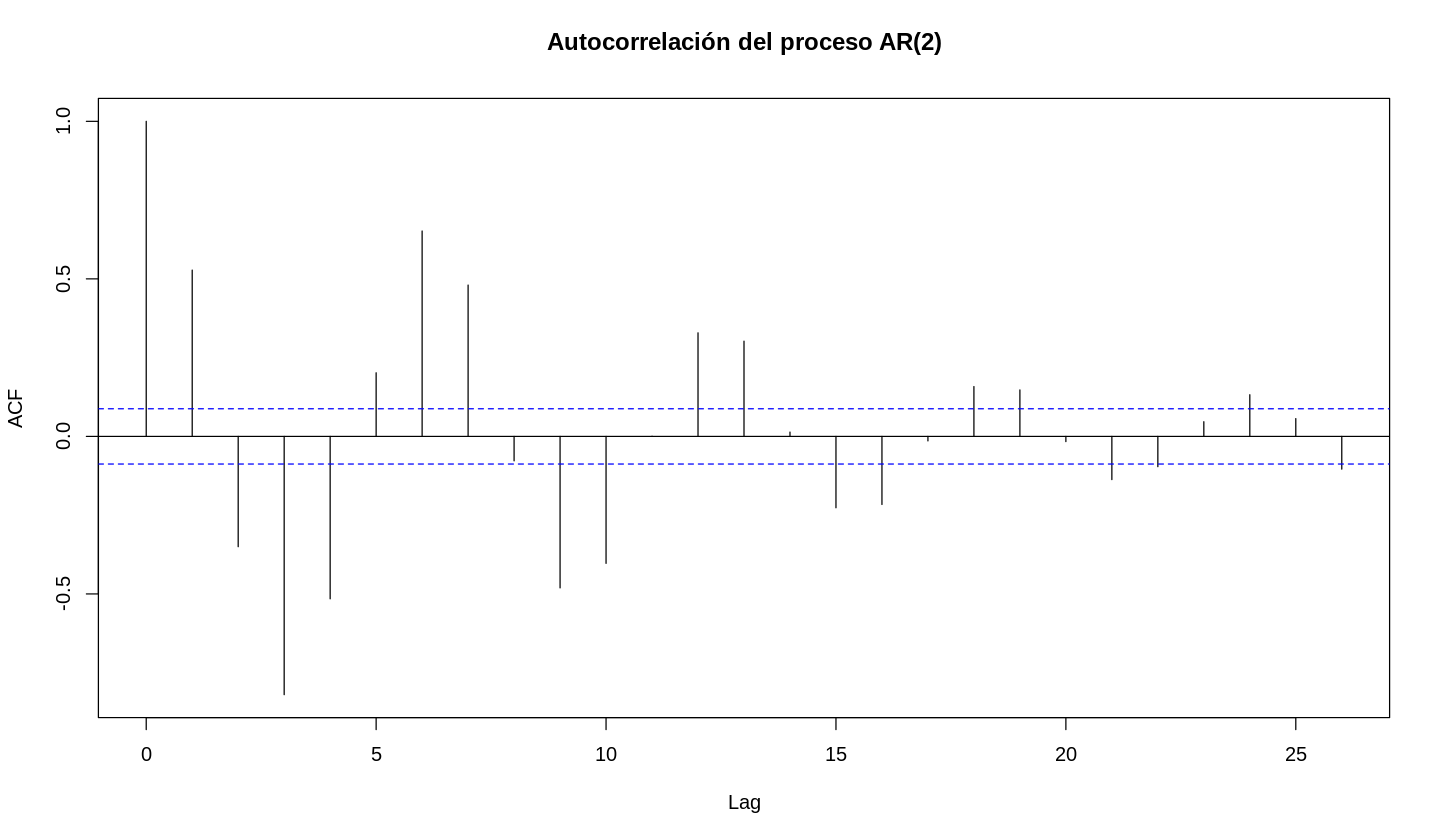

In [5]:
acf(x, main="Autocorrelación del proceso AR(2)")

> **Ejemplo:**
>
>Consideremos el proceso:
> $$x_t = 0.9 x_{t-1} + w_t.$$
>
> Con $x_{0}$ dado (por ejemplo 0).

Este es un proceso *autorregresivo de orden 1*. Cada muestra recuerda a la anterior.

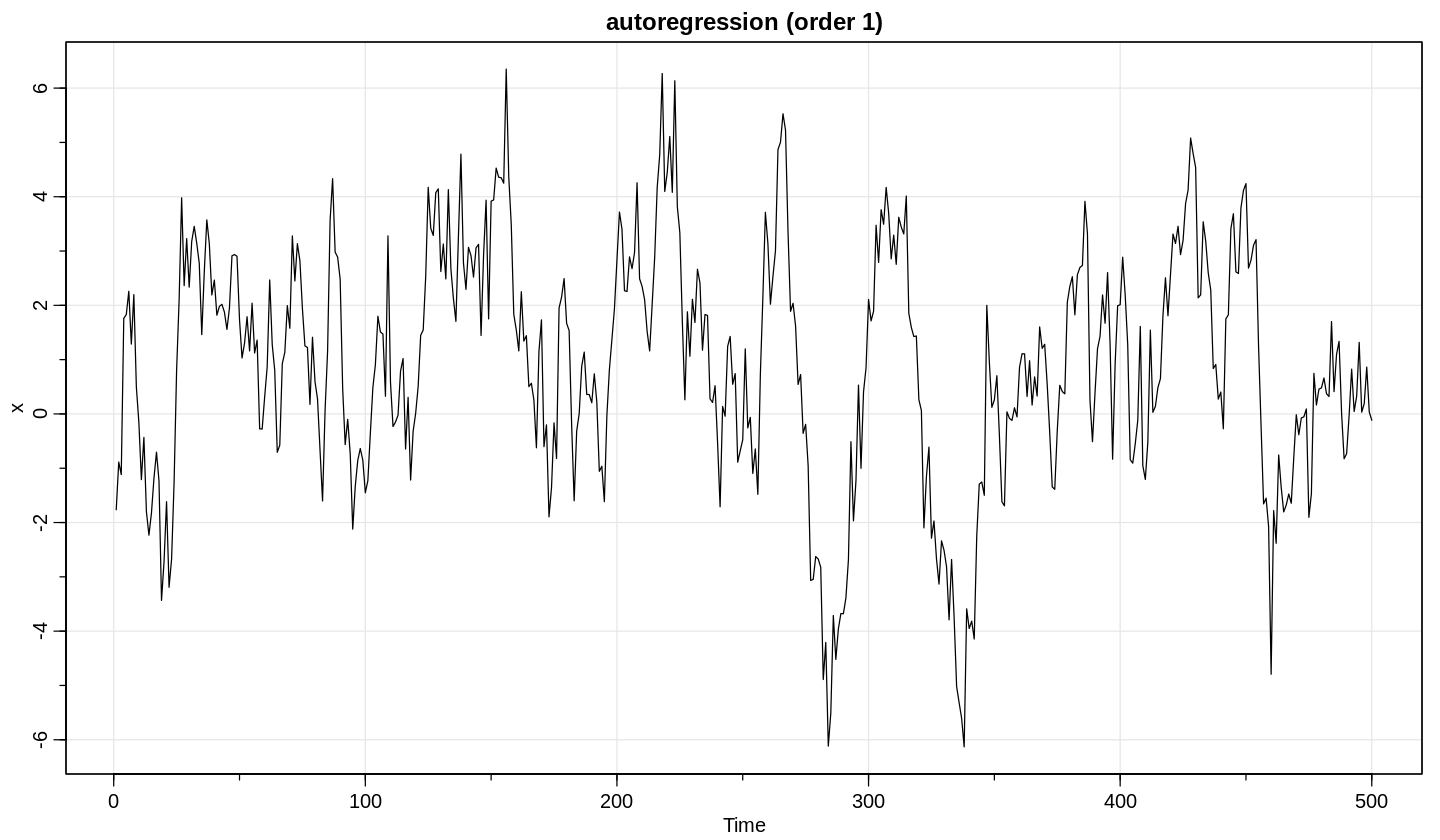

In [6]:
#esto se construye con el comando "filter" de R
x = filter(w, filter=c(0.9), method="recursive")
tsplot(x, main="autoregression (order 1)")

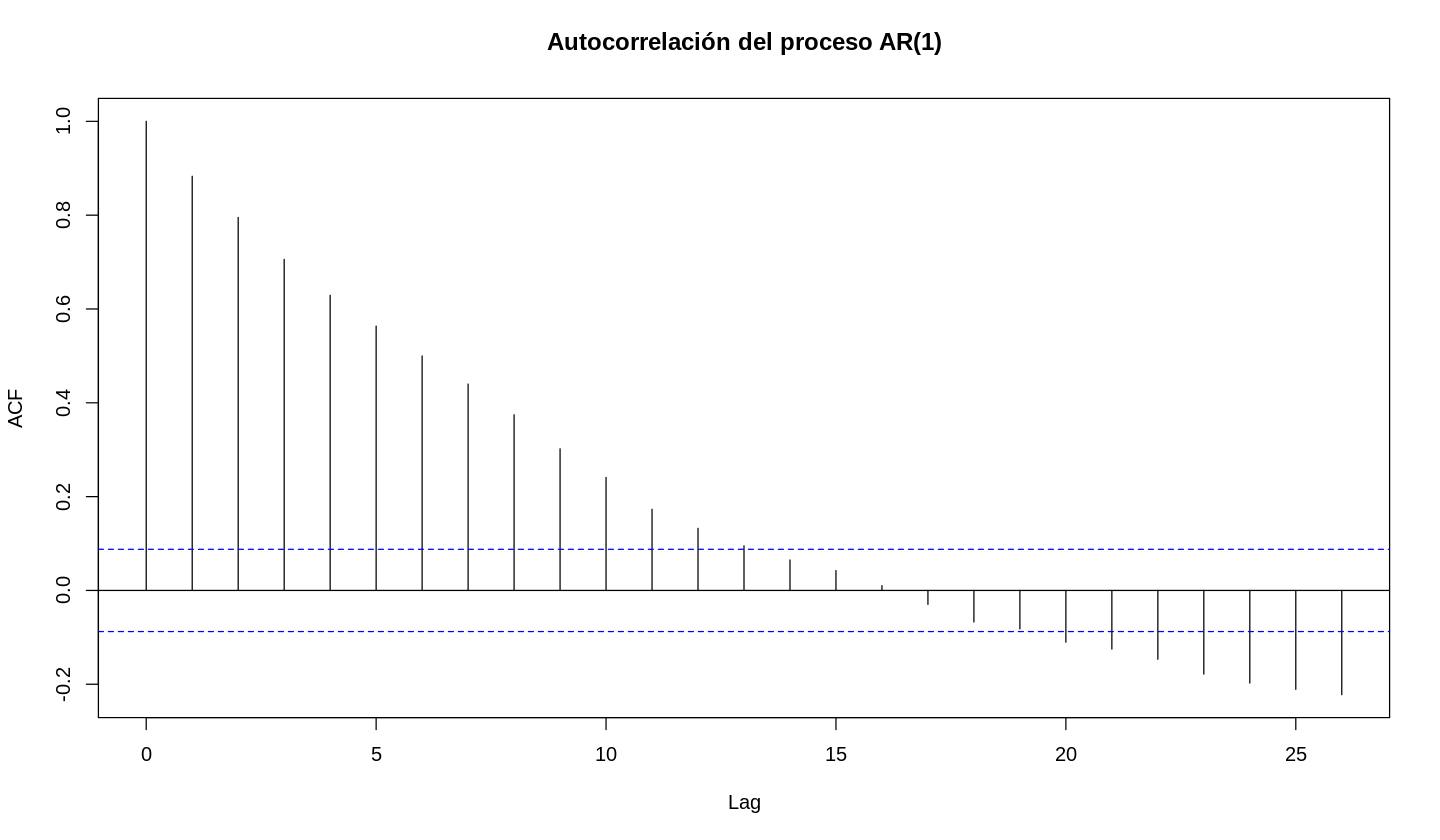

In [7]:
acf(x, main="Autocorrelación del proceso AR(1)")

**Pregunta:** ¿Cómo podemos determinar el orden de un proceso de este tipo? ¿Cómo podemos determinar sus parámetros?

### Estimación de un AR(1)

Probemos mirar la correlación entre un valor y el anterior:

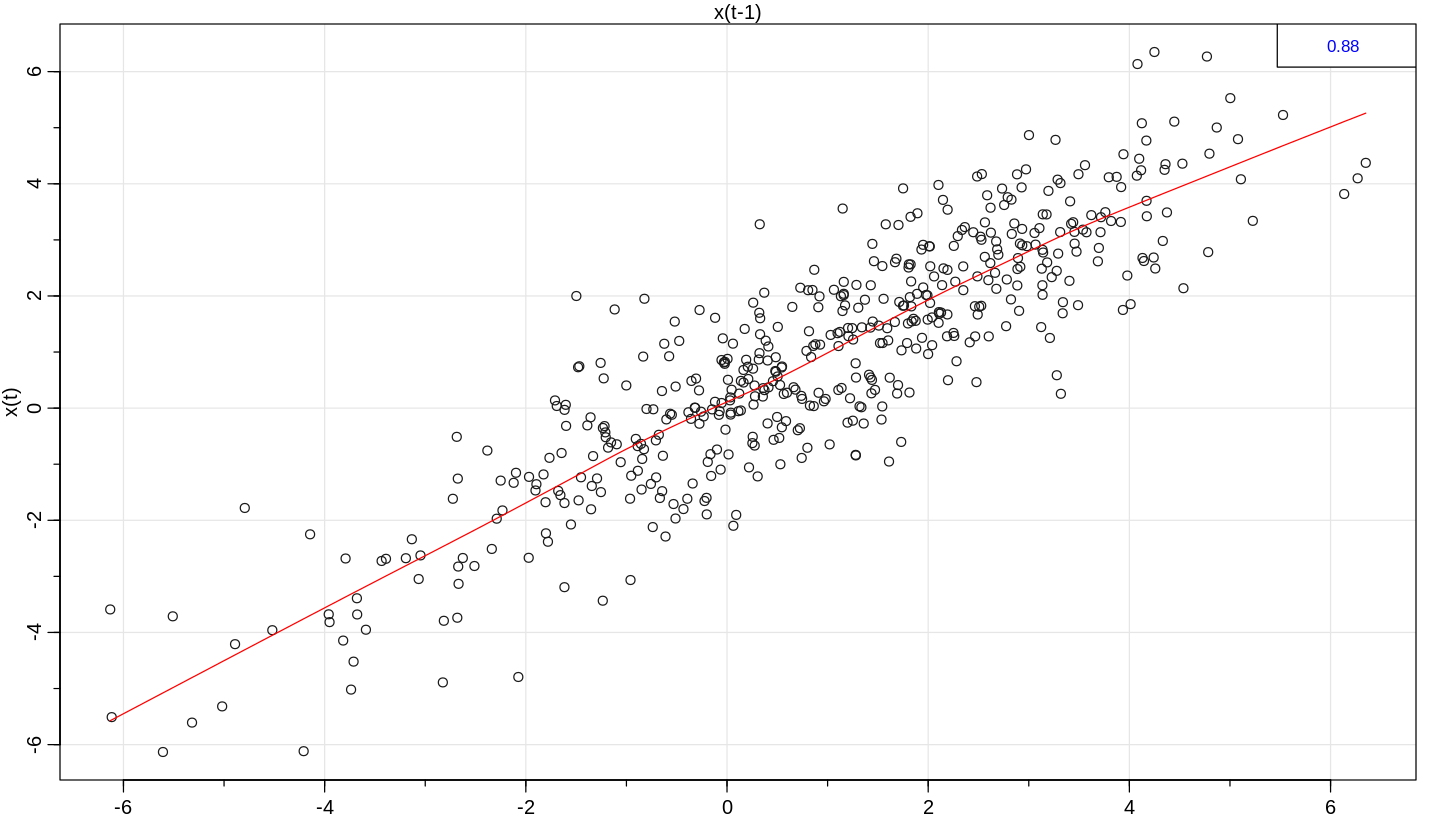

In [8]:
#Este comando plotea x_t vs x_t-1
lag1.plot(x,1)

In [9]:
dos_series = ts.intersect(x,xt1=lag(x,-1))
fit <- lm(x~0+xt1,data=dos_series)
summary(fit)


Call:
lm(formula = x ~ 0 + xt1, data = dos_series)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9250 -0.6105  0.1354  0.7349  3.3486 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt1  0.90087    0.01939   46.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.023 on 498 degrees of freedom
Multiple R-squared:  0.8125,	Adjusted R-squared:  0.8121 
F-statistic:  2158 on 1 and 498 DF,  p-value: < 2.2e-16


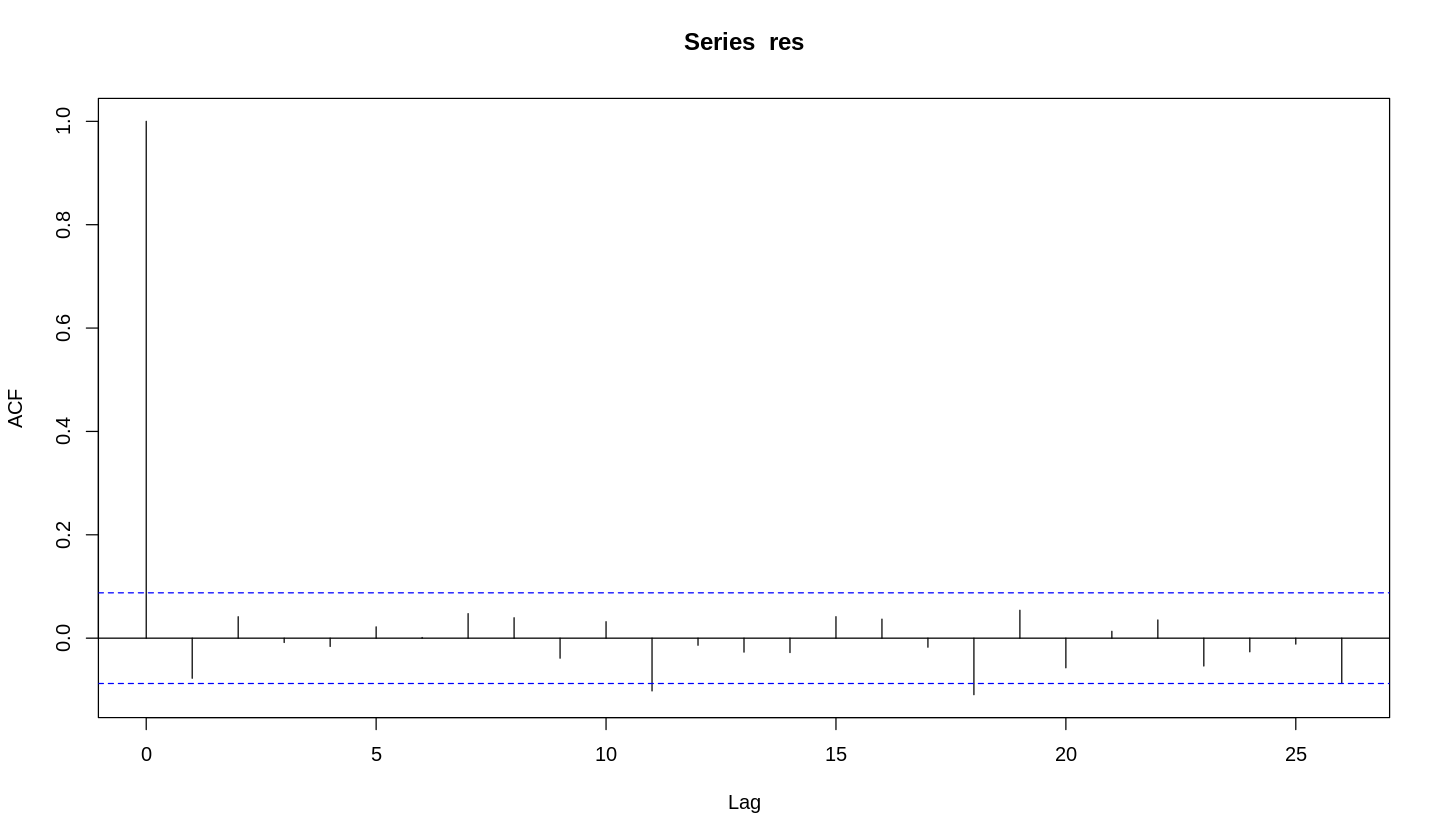

In [10]:
#Miramos los residuos del ajuste
res = residuals(fit)
acf(res)

### Probemos ahora con el AR(2)

$$x_t = x_{t-1} - 0.9x_{t-2} + w_t.$$

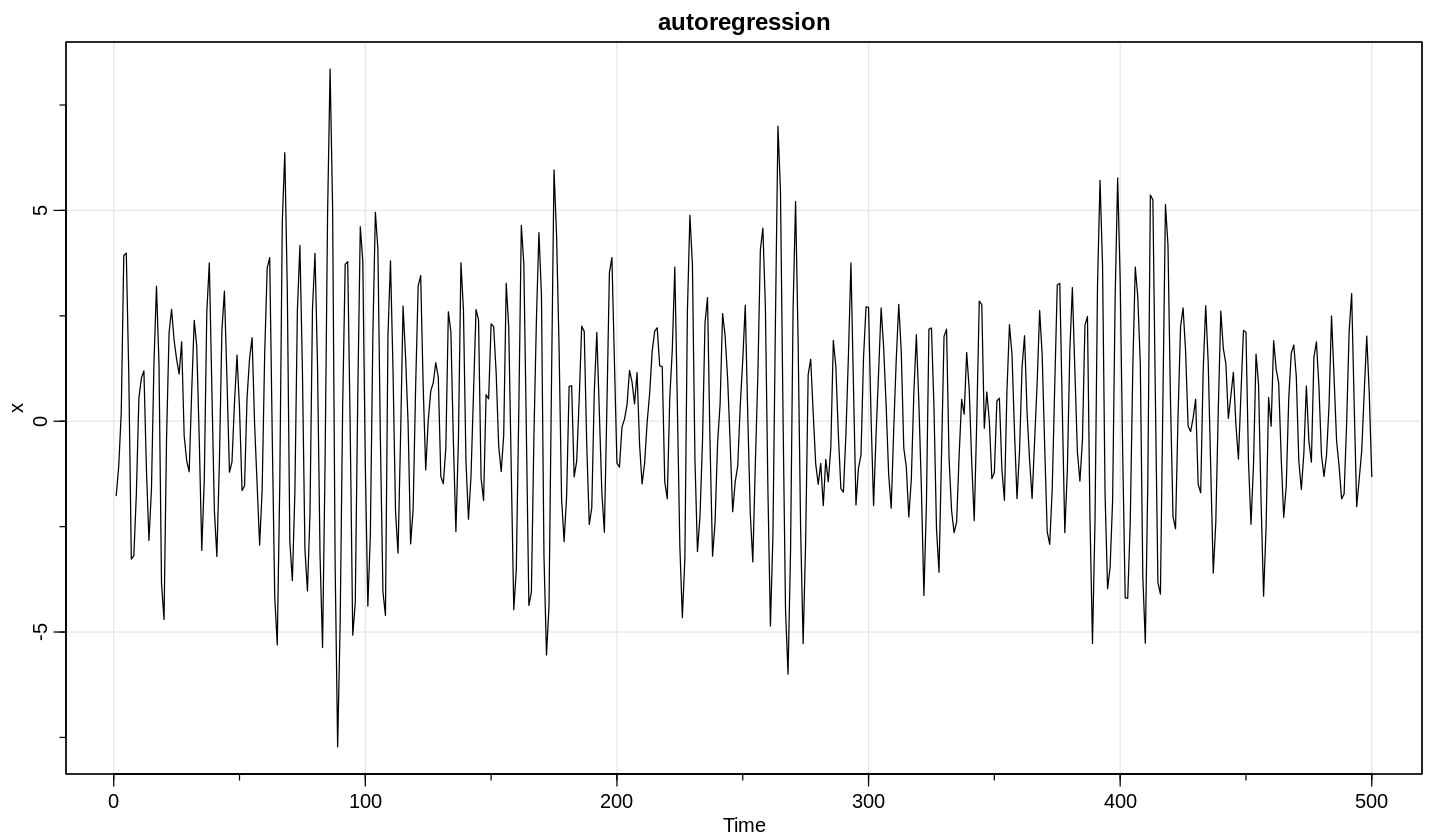

In [11]:
#esto se construye con el comando "filter" de R
x = filter(w, filter=c(1,-.9), method="recursive")
tsplot(x, main="autoregression")

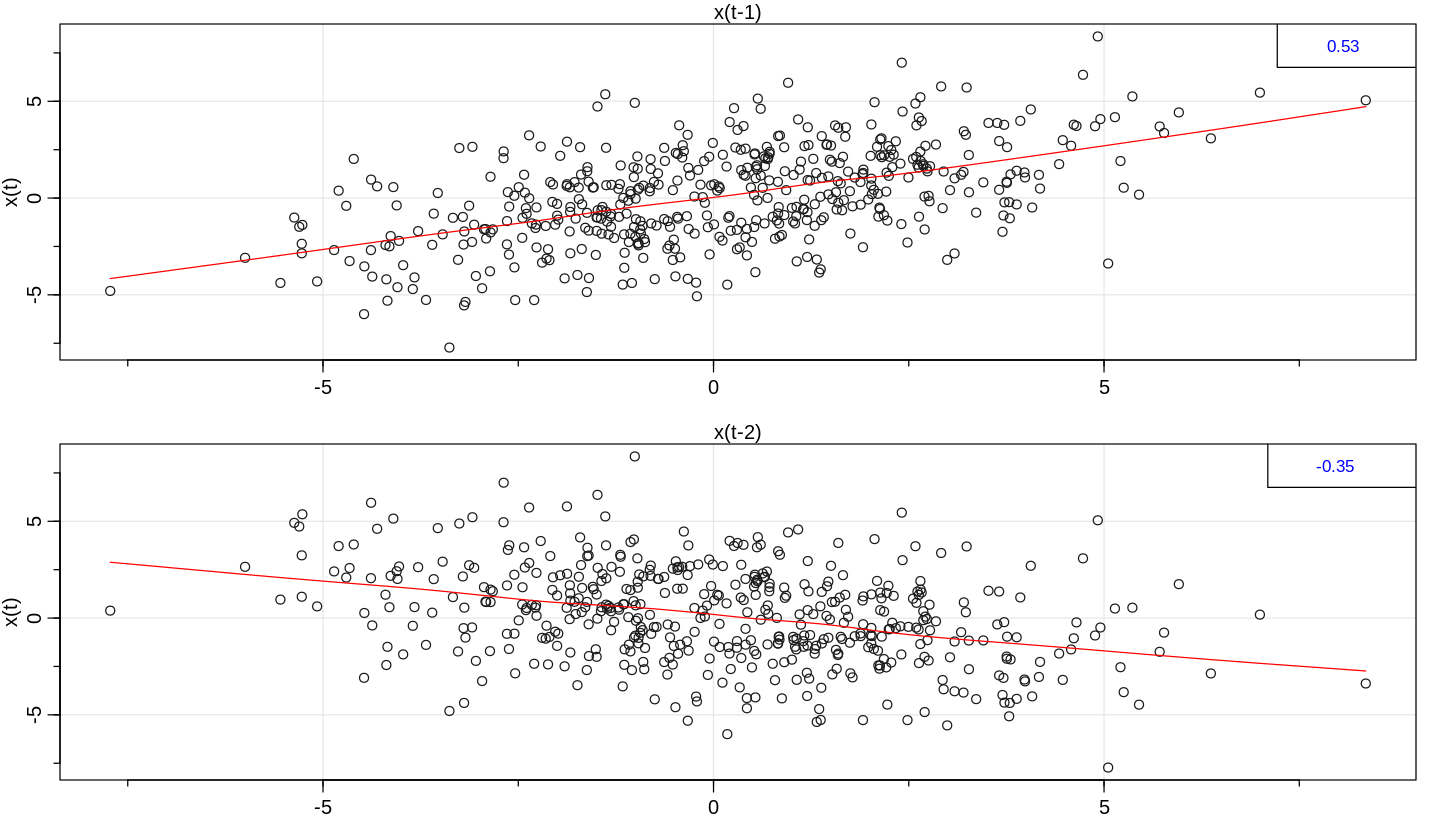

In [12]:
lag1.plot(x,2)

In [13]:
tres_series = ts.intersect(x,xt1=lag(x,-1),xt2=lag(x,-2))
fit <- lm(x~0+xt1+xt2,data=tres_series)
summary(fit)


Call:
lm(formula = x ~ 0 + xt1 + xt2, data = tres_series)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8536 -0.6178  0.1269  0.7365  3.2701 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt1  0.99126    0.02196   45.15   <2e-16 ***
xt2 -0.87261    0.02195  -39.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.023 on 496 degrees of freedom
Multiple R-squared:  0.828,	Adjusted R-squared:  0.8273 
F-statistic:  1194 on 2 and 496 DF,  p-value: < 2.2e-16


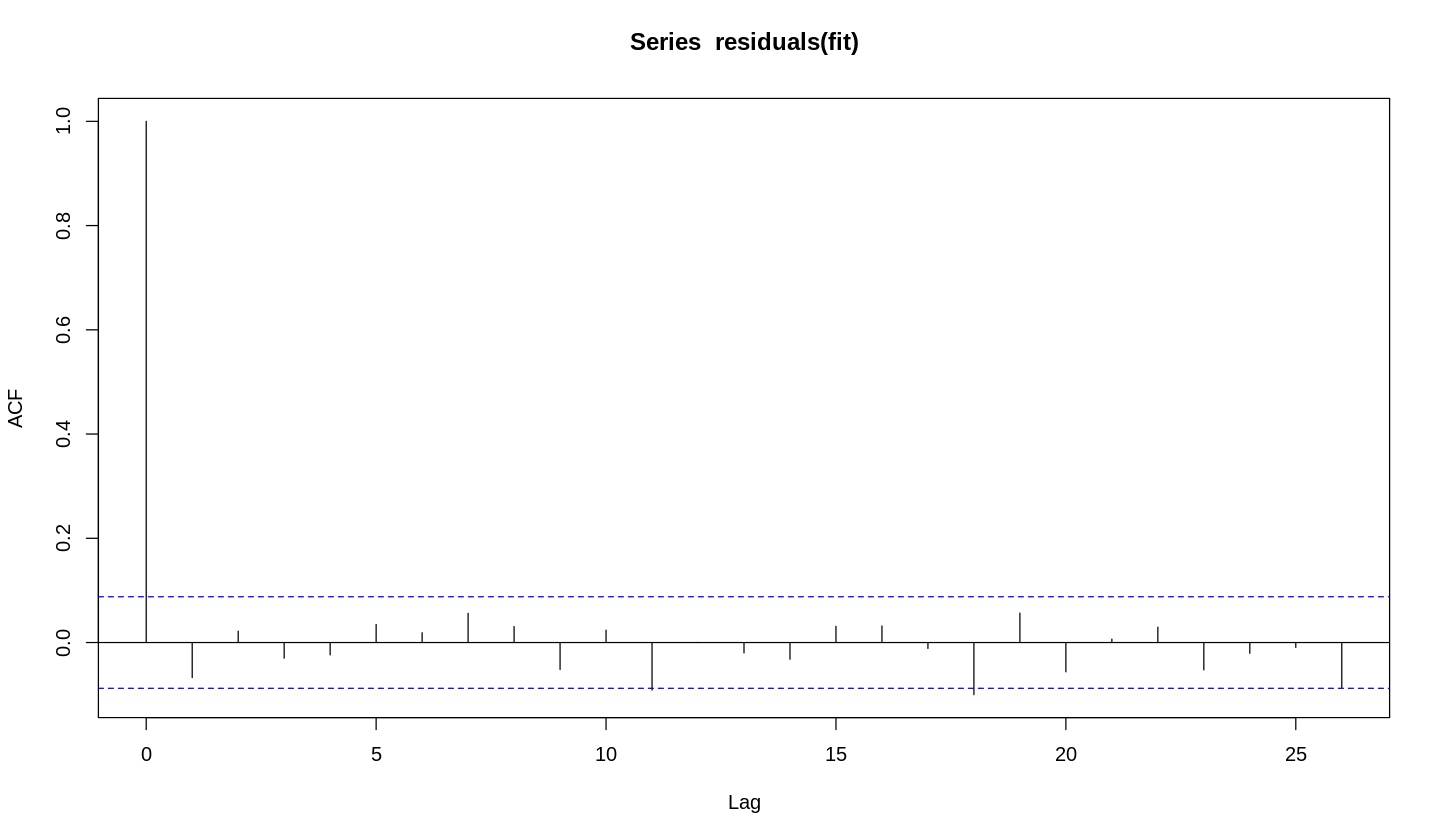

In [14]:
acf(residuals(fit))

Comparemos los residuos con el ruido que dio origen a la serie:

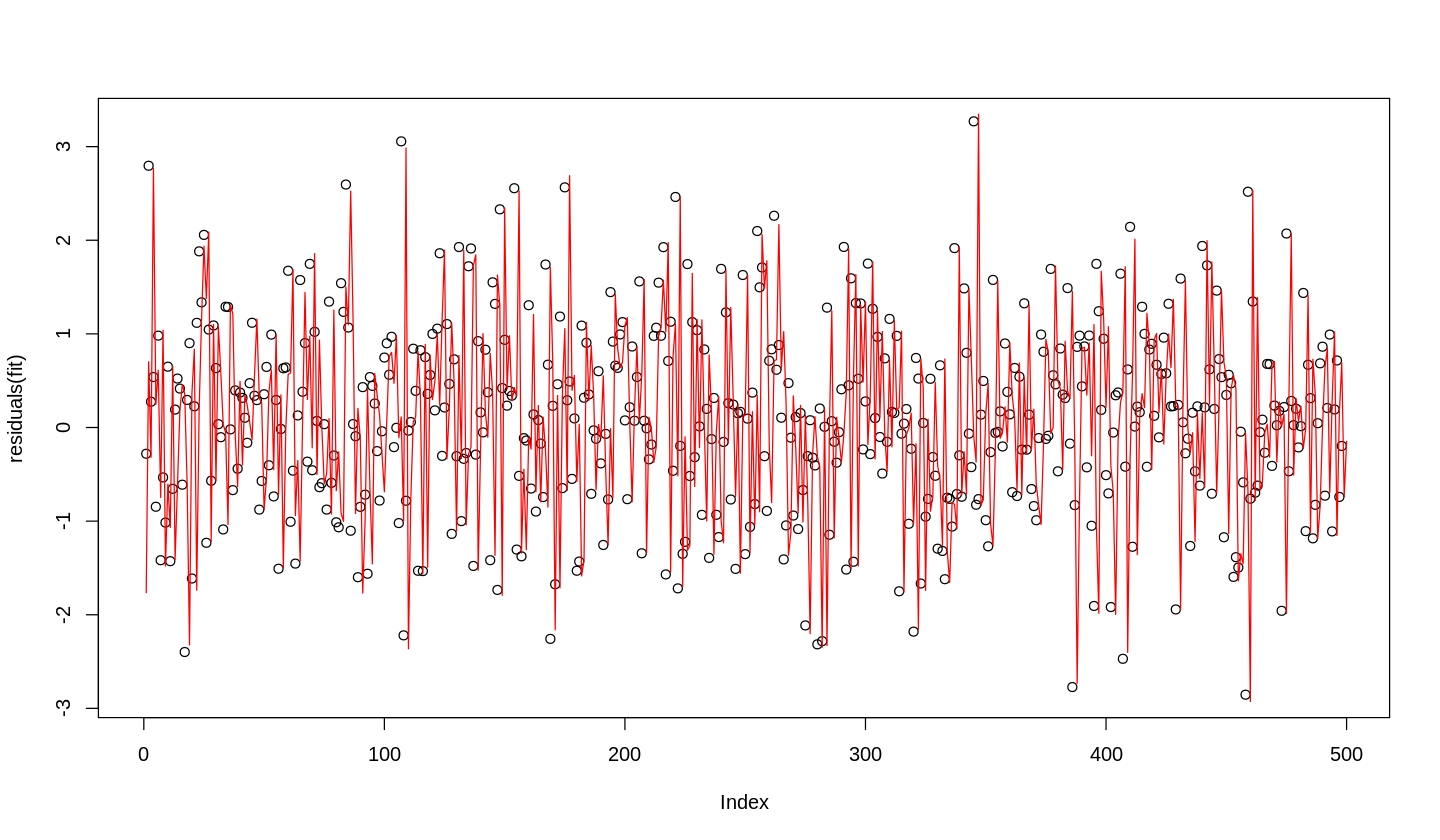

In [15]:
plot(residuals(fit))
lines(w,col="red")

### Conclusiones:

* En un modelo AR(p), cada muestra depende del ruido actual y de una combinación lineal de las observaciones anteriores

* La autocorrelación de todos modos depende de todas las muestras que vinieron antes!

* Si conocemos el *orden* del modelo, podemos hacer una regresión lineal para explicar $x_t$ a partir de $x_{t-1}$ hasta $x_{t-p}$. De ese modo se obtienen los valores de los coeficientes.

* Si el proceso ajusta, los residuos deben coincidir con los del ruido blanco y se parecen al ruido que dio origen a la serie.

### ¿Cómo averiguamos el orden del modelo? Función de autocorrelación parcial (PACF)

**Idea:** construir una función de correlación que solo contenga los aportes "incrementales" de agregar un lag, y no la correlación completa.

Se explica mejor a través de un ejemplo, dejaremos la teoría para más adelante.

Retomemos la serie:

$$x_t = x_{t-1} - 0.9 x_{t-2} + w_t.$$

Recordemos la función de autocorrelación (ACF)

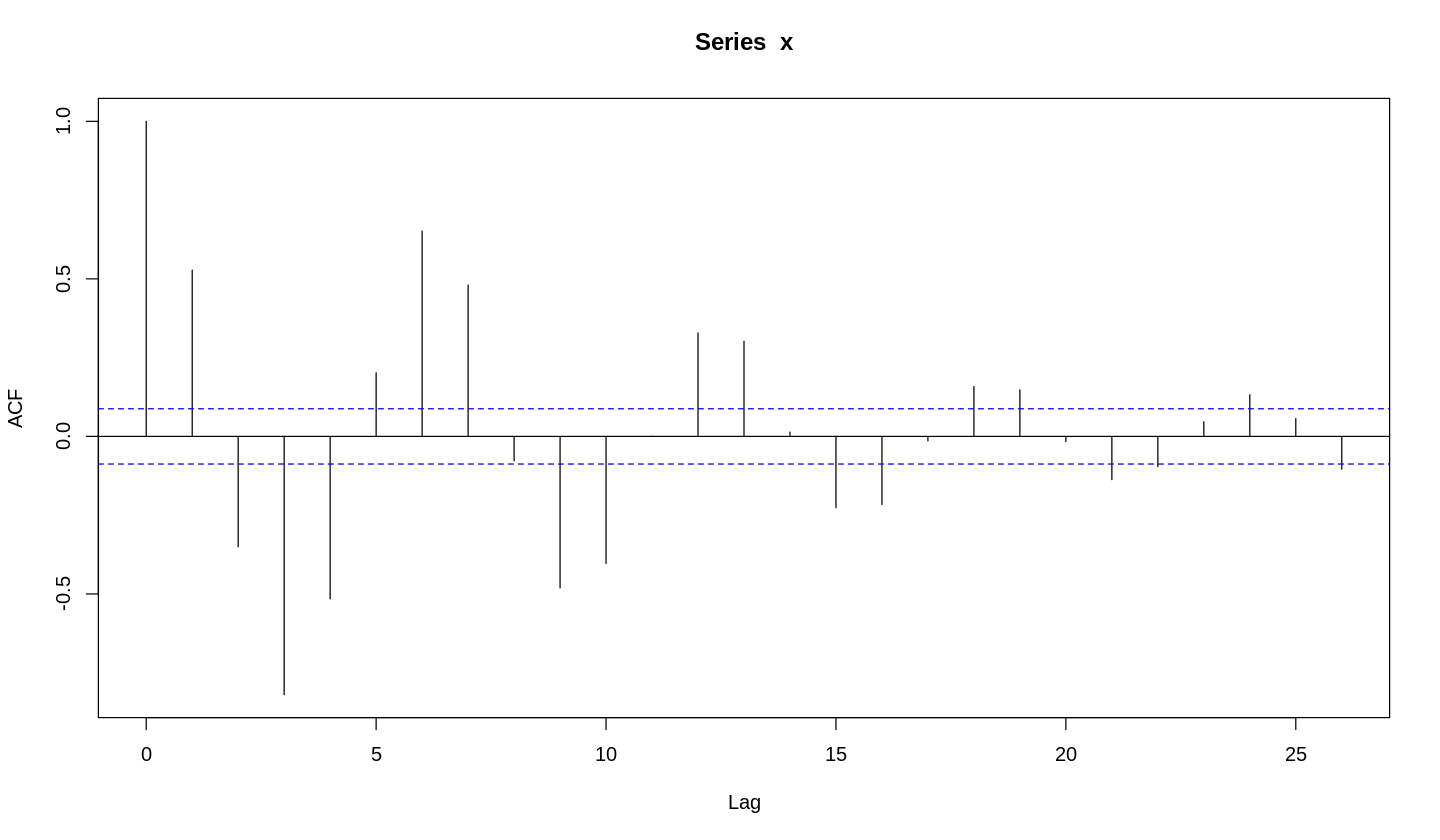

In [16]:
acf(x)

**Paso 1:** Ajustamos $x_t$ a $x_{t-1}$:

In [17]:
#Corto la serie x con la serie x laggeada
dos_series = ts.intersect(x,xt1=lag(x,-1))
#Ajusto
fit1 <- lm(x~0+xt1,data=dos_series)
summary(fit1) #el coef. hallado es la correlación de xt y xt-1, es decir acf(1)


Call:
lm(formula = x ~ 0 + xt1, data = dos_series)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0544 -1.3792  0.0937  1.4562  6.0961 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt1  0.52900    0.03802   13.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.088 on 498 degrees of freedom
Multiple R-squared:   0.28,	Adjusted R-squared:  0.2785 
F-statistic: 193.6 on 1 and 498 DF,  p-value: < 2.2e-16


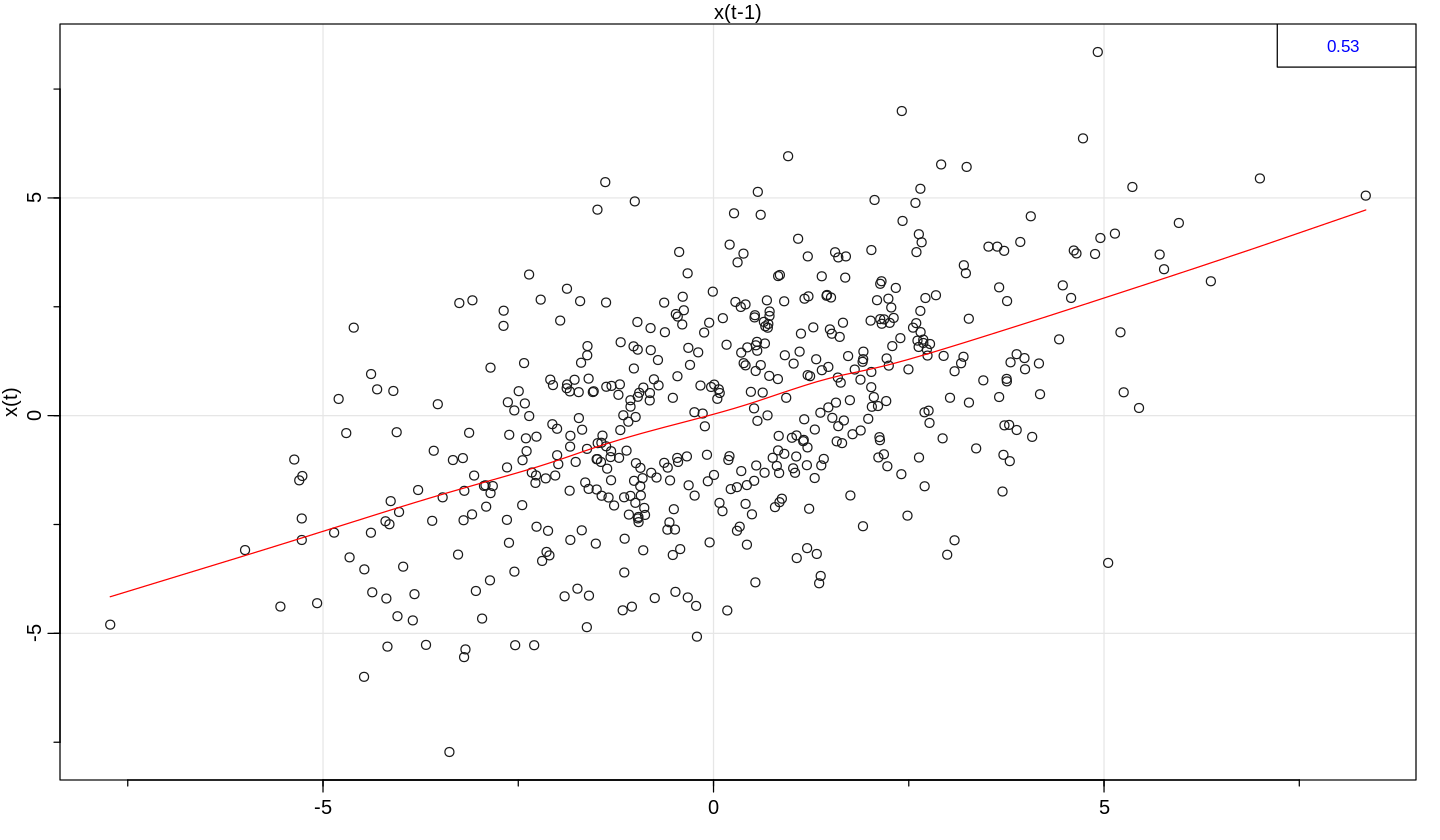

In [18]:
lag1.plot(x,1)

In [19]:
#capturo los residuos del ajuste anterior y construyo una serie temporal
r1 = residuals(fit1)
r1=ts(r1)

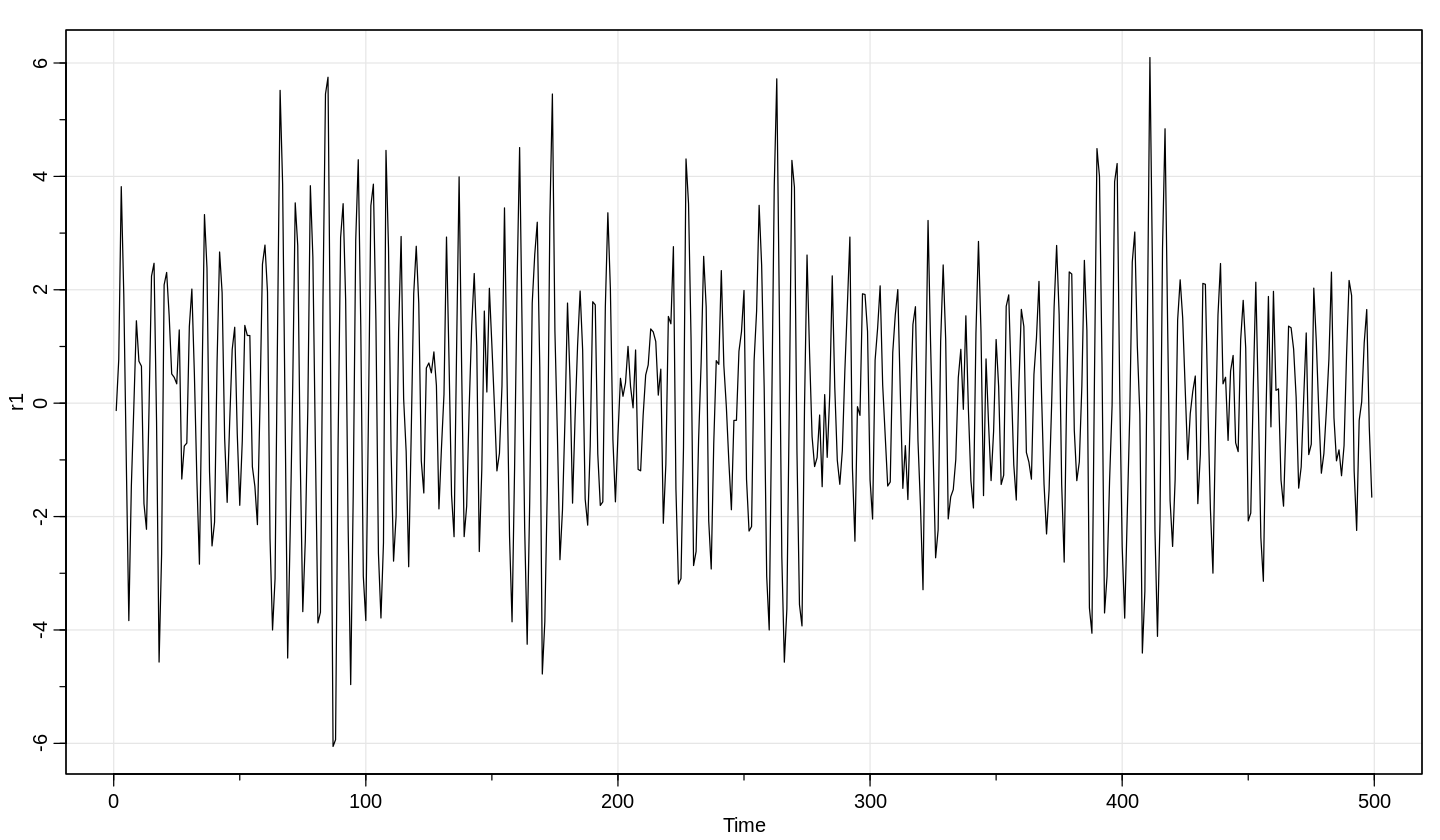

In [20]:
tsplot(r1)

Sigamos un paso más. Tomemos los residuos $r^1_t$ del ajuste anterior y tratemos de ajustarlos a $x_{t-2}$ para "explicar" lo no explicado por la primera componente.

In [21]:
#Repito el procedimiento ajustando los residuos a la serie laggeada 2
dos_series = ts.intersect(r1,xt2=lag(x,-2))
#Ajusto
fit2 <- lm(r1~0+xt2,data=dos_series)
summary(fit2) #el coef. hallado es el pacf(2)


Call:
lm(formula = r1 ~ 0 + xt2, data = dos_series)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9006 -0.8791  0.1944  1.0197  4.1485 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt2 -0.63445    0.02532  -25.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.39 on 496 degrees of freedom
Multiple R-squared:  0.5586,	Adjusted R-squared:  0.5577 
F-statistic: 627.7 on 1 and 496 DF,  p-value: < 2.2e-16


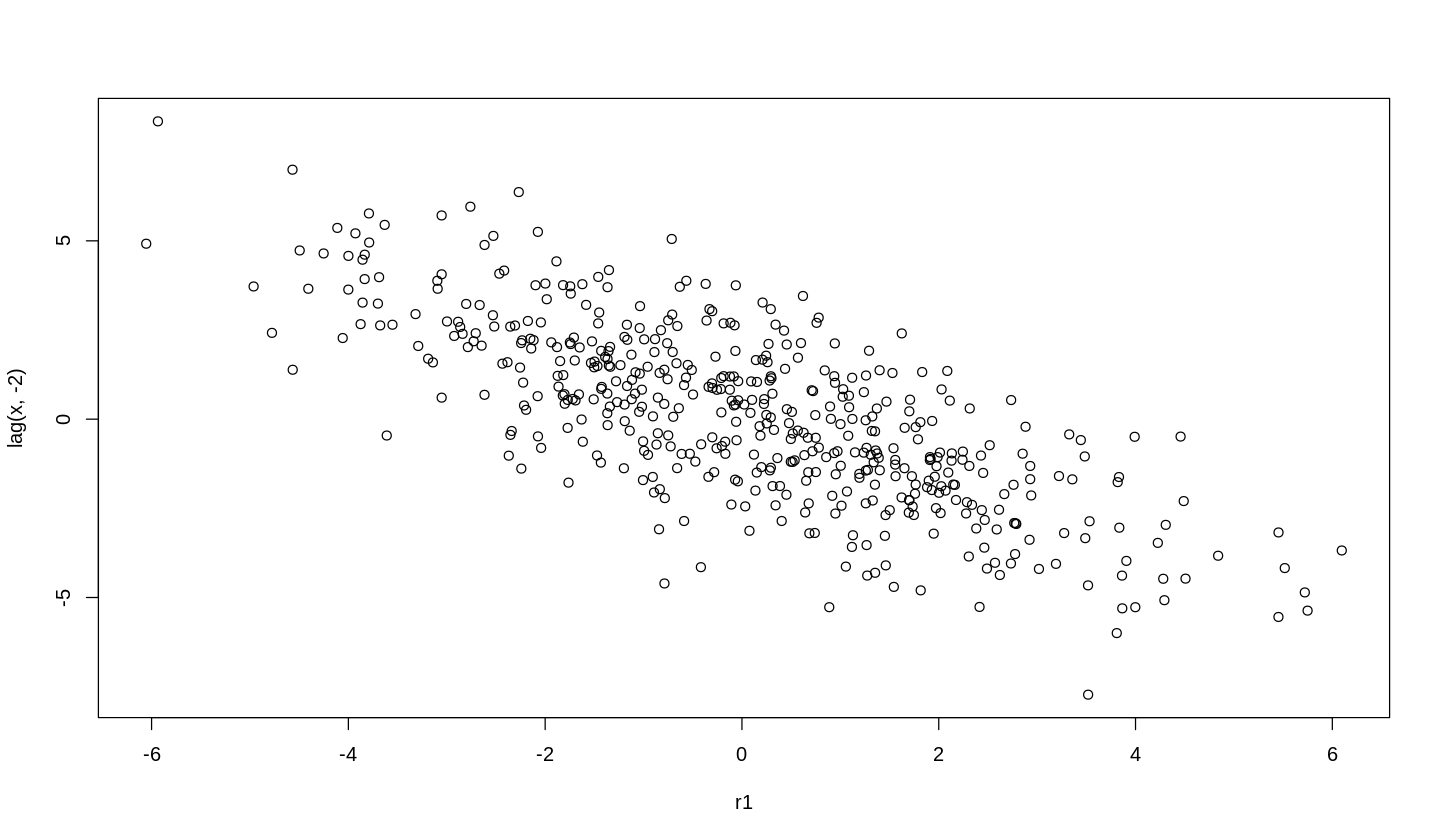

In [22]:
plot(r1,lag(x,-2))

Sigamos un paso más: tratemos de explicar a su vez los residuos de este nuevo ajuste $r^2_t$ a través de $x_{t-3}$: 

In [23]:
#capturo los residuos del ajuste anterior y construyo una serie temporal
r2 = residuals(fit2)
r2=ts(r2)

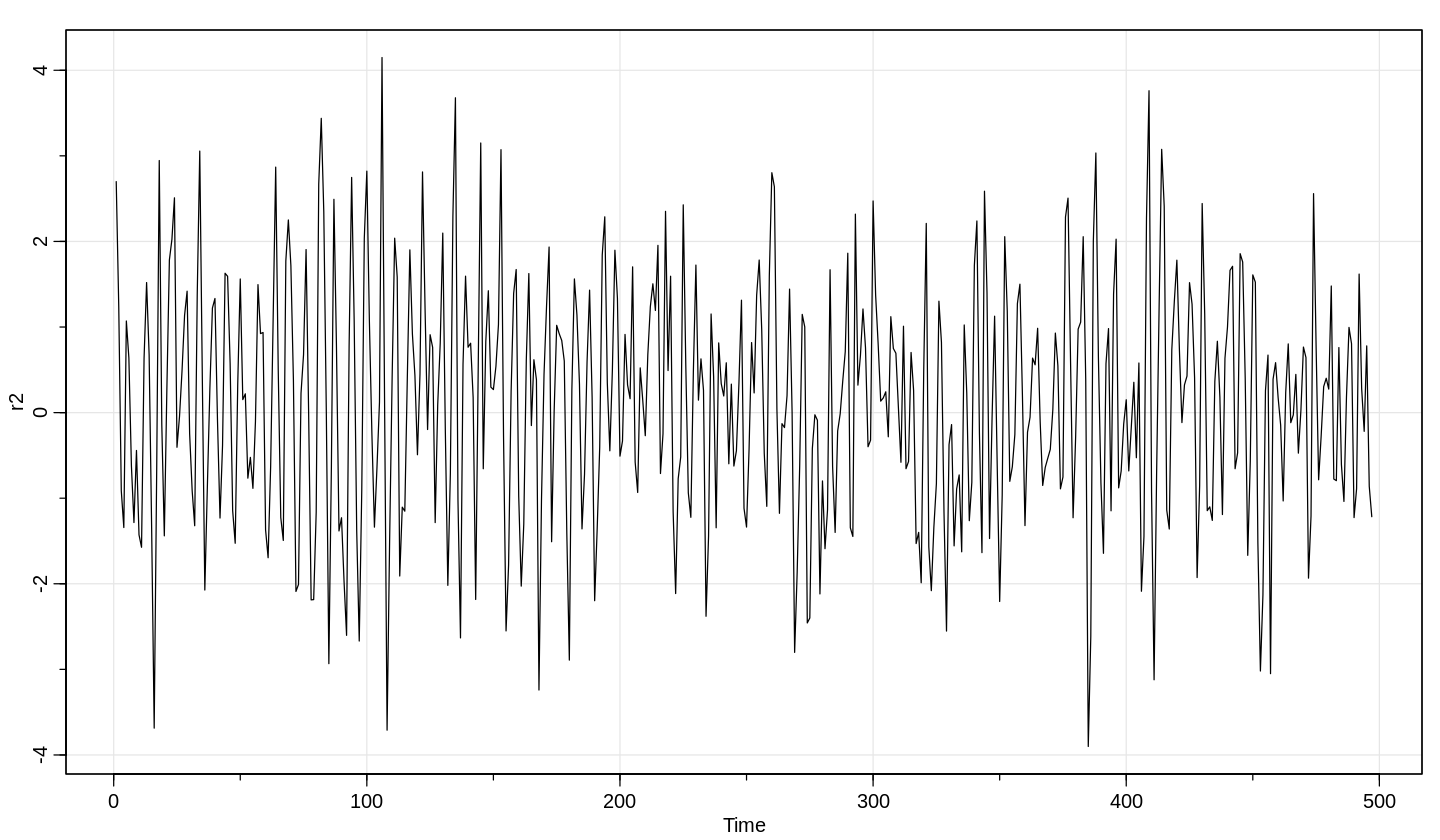

In [24]:
tsplot(r2)

In [25]:
#Repito el procedimiento ajustando los residuos a la serie laggeada 3
dos_series = ts.intersect(r2,xt3=lag(x,-3))
#Ajusto
fit3 <- lm(r2~0+xt3,data=dos_series)
summary(fit3) #el coef. hallado es la correlación de xt y xt-1, es decir acf(1)


Call:
lm(formula = r2 ~ 0 + xt3, data = dos_series)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9343 -0.8413  0.1915  1.0470  4.0907 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)
xt3  0.02803    0.02525    1.11    0.267

Residual standard error: 1.386 on 493 degrees of freedom
Multiple R-squared:  0.002494,	Adjusted R-squared:  0.0004704 
F-statistic: 1.232 on 1 and 493 DF,  p-value: 0.2675


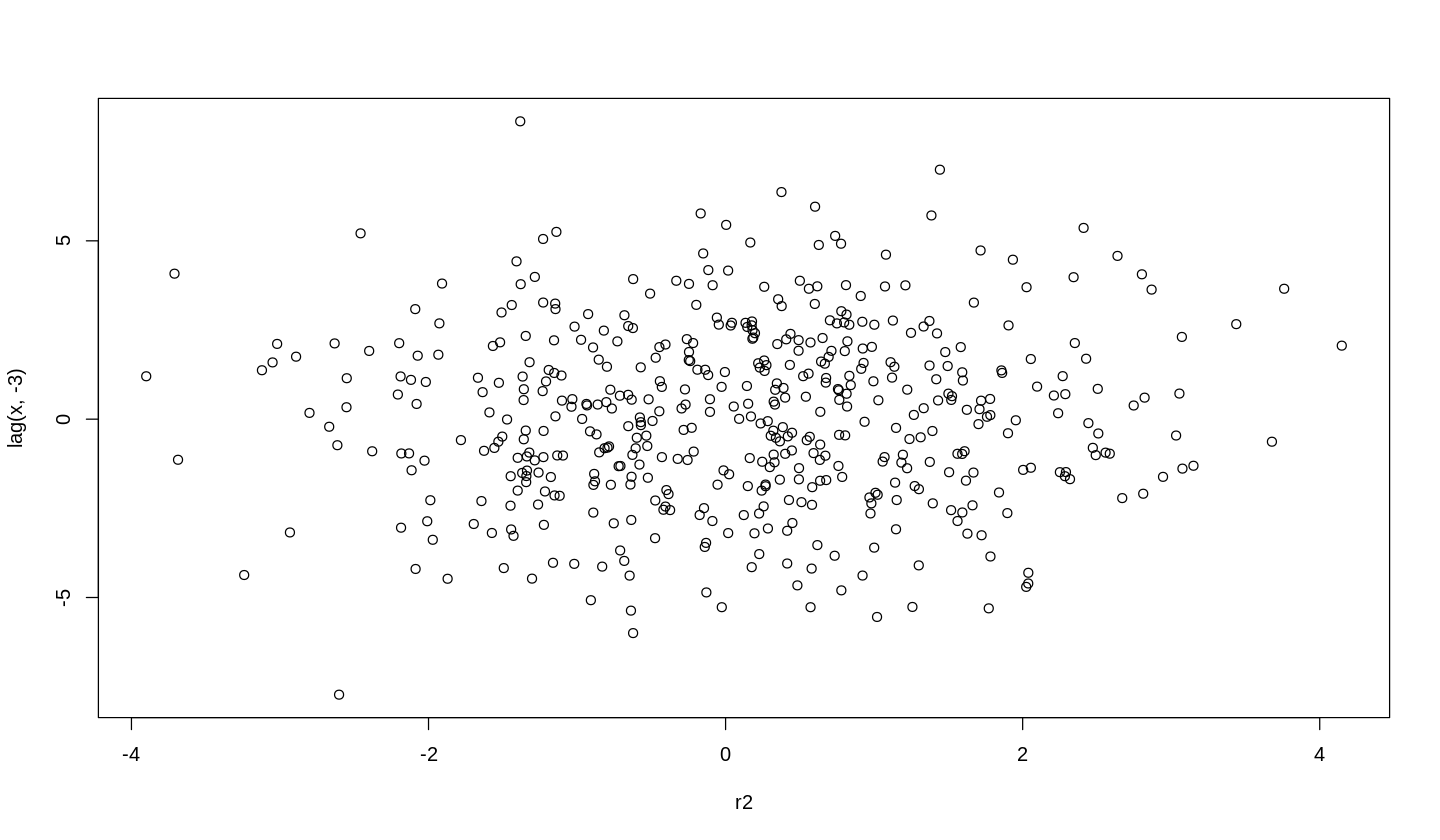

In [26]:
plot(r2,lag(x,-3))

### Función de autocorrelación parcial (PACF)

* A la función así construida recursivamente se le denomina Función de Autocorrelación Parcial (PACF).
* En el ejemplo anterior, la PACF(1) coincide con la CCF(1). La PACF(2) *NO* (es otra información).
* En el proceso AR(2), la PACF(2) era significativa, la PACF(3) se vuelve 0.
* En general, si un proceso es AR($p$), entonces la PACF se "apaga" luego de $p$.

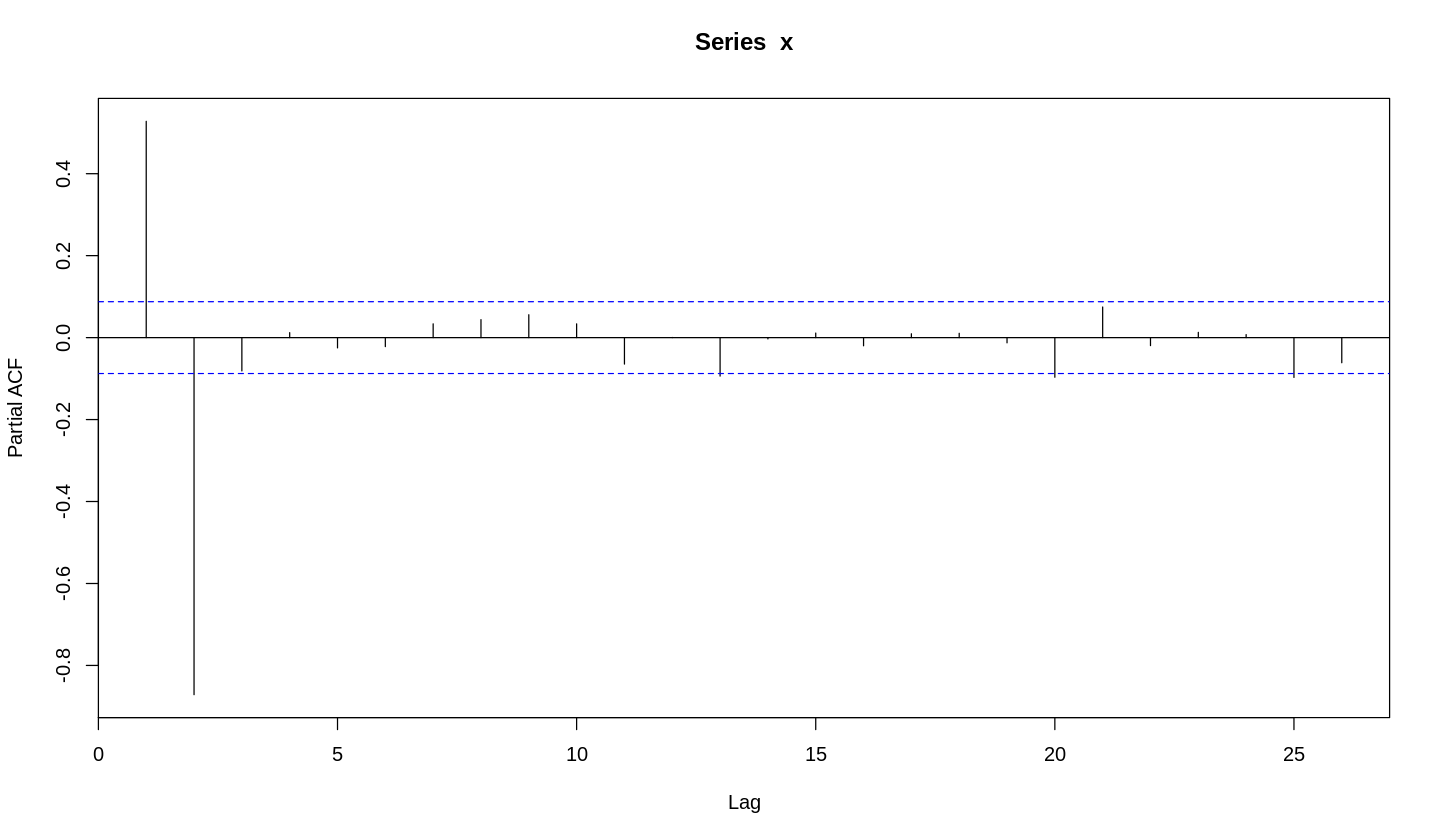

In [27]:
#En R, podemos calcular la PACF usando:
pacf(x)

Apliquemos la misma idea al proceso AR(1) que teníamos antes

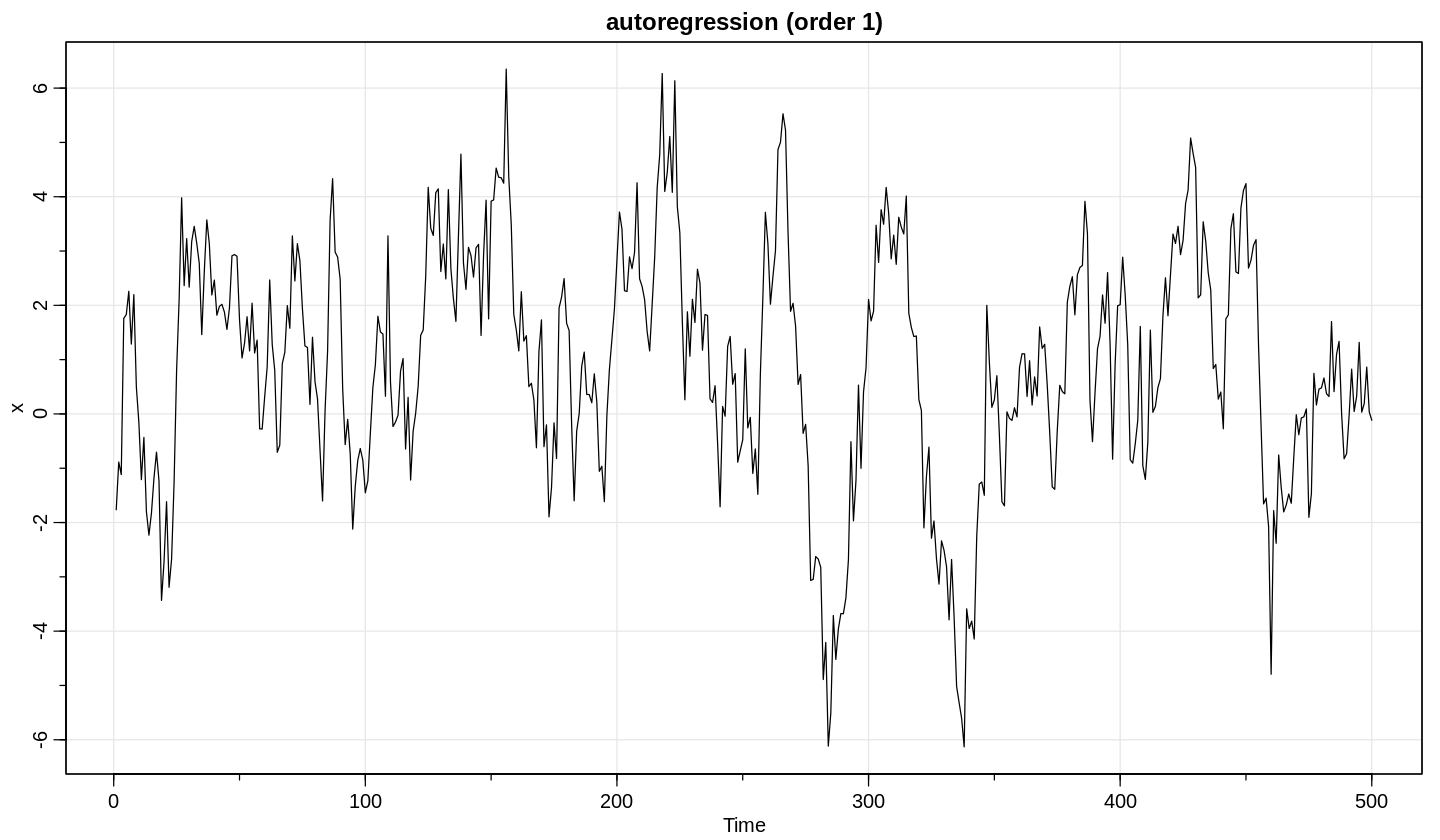

In [28]:
#esto se construye con el comando "filter" de R
x = filter(w, filter=c(0.9), method="recursive")
tsplot(x, main="autoregression (order 1)")

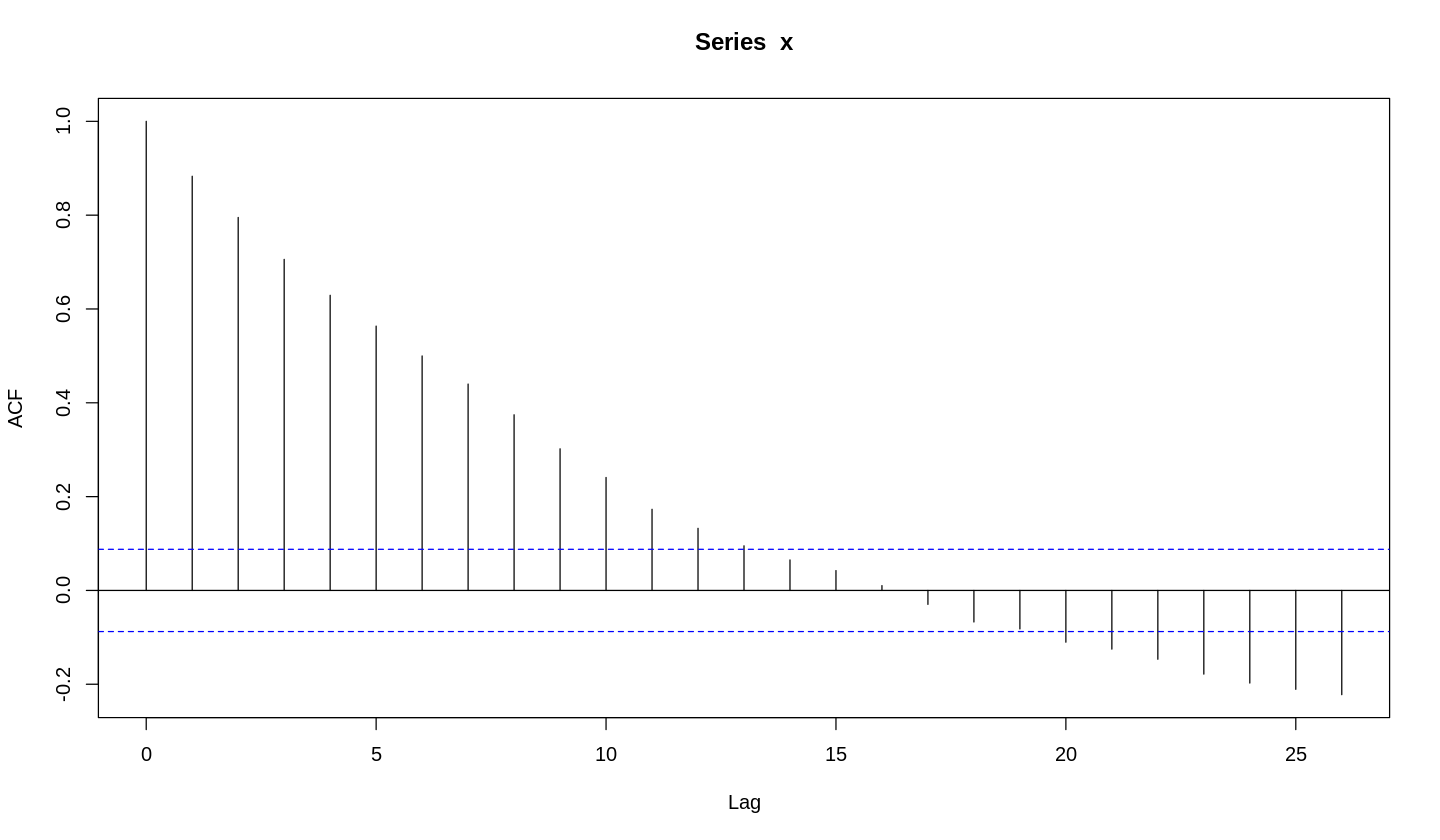

In [29]:
acf(x)

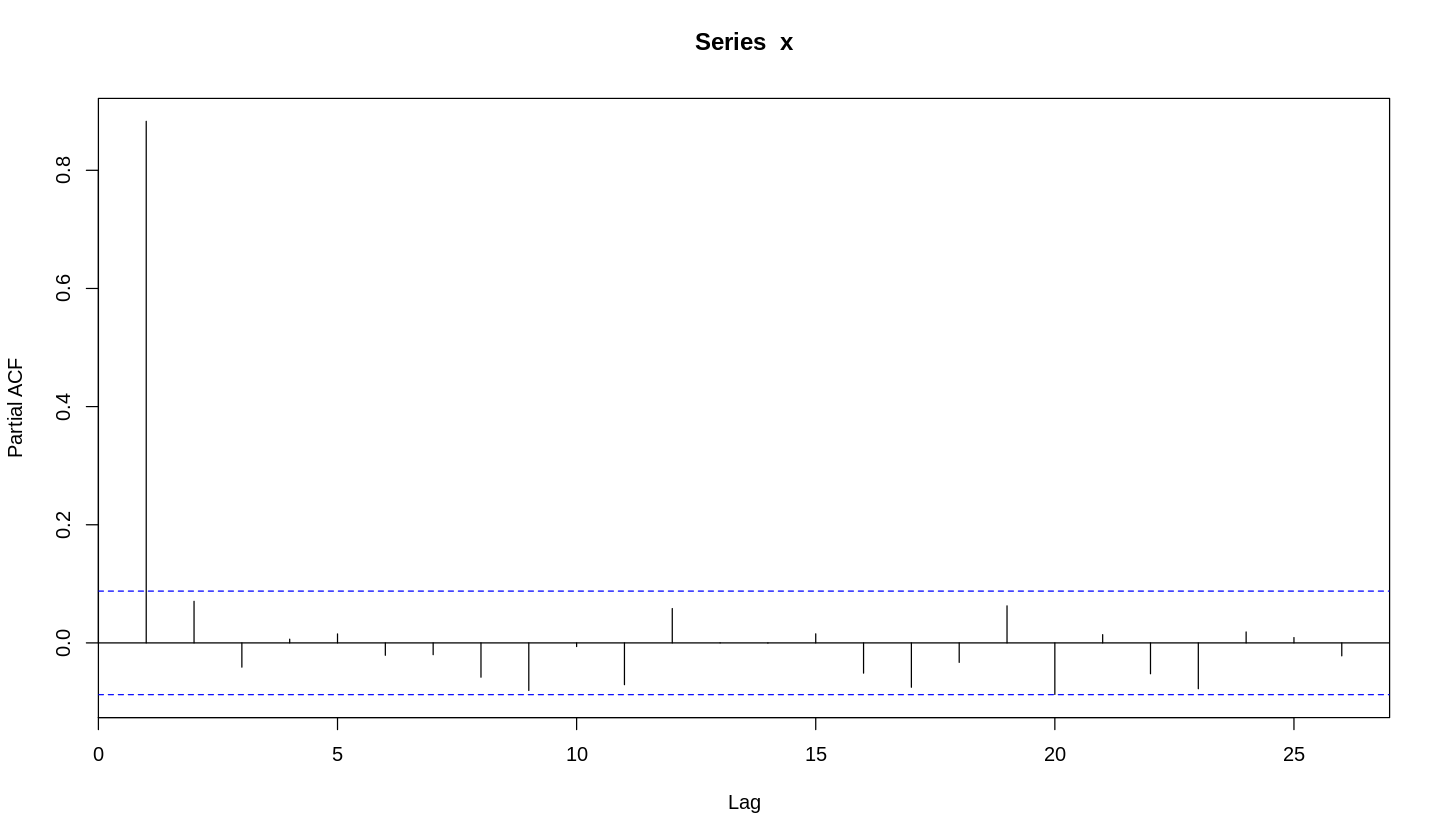

In [30]:
pacf(x)

## Ejercicio:

Analizar la serie `cmort` de mortalidad cardiovascular en Los Angeles y ajustar un modelo autorregresivo de orden adecuado a la misma

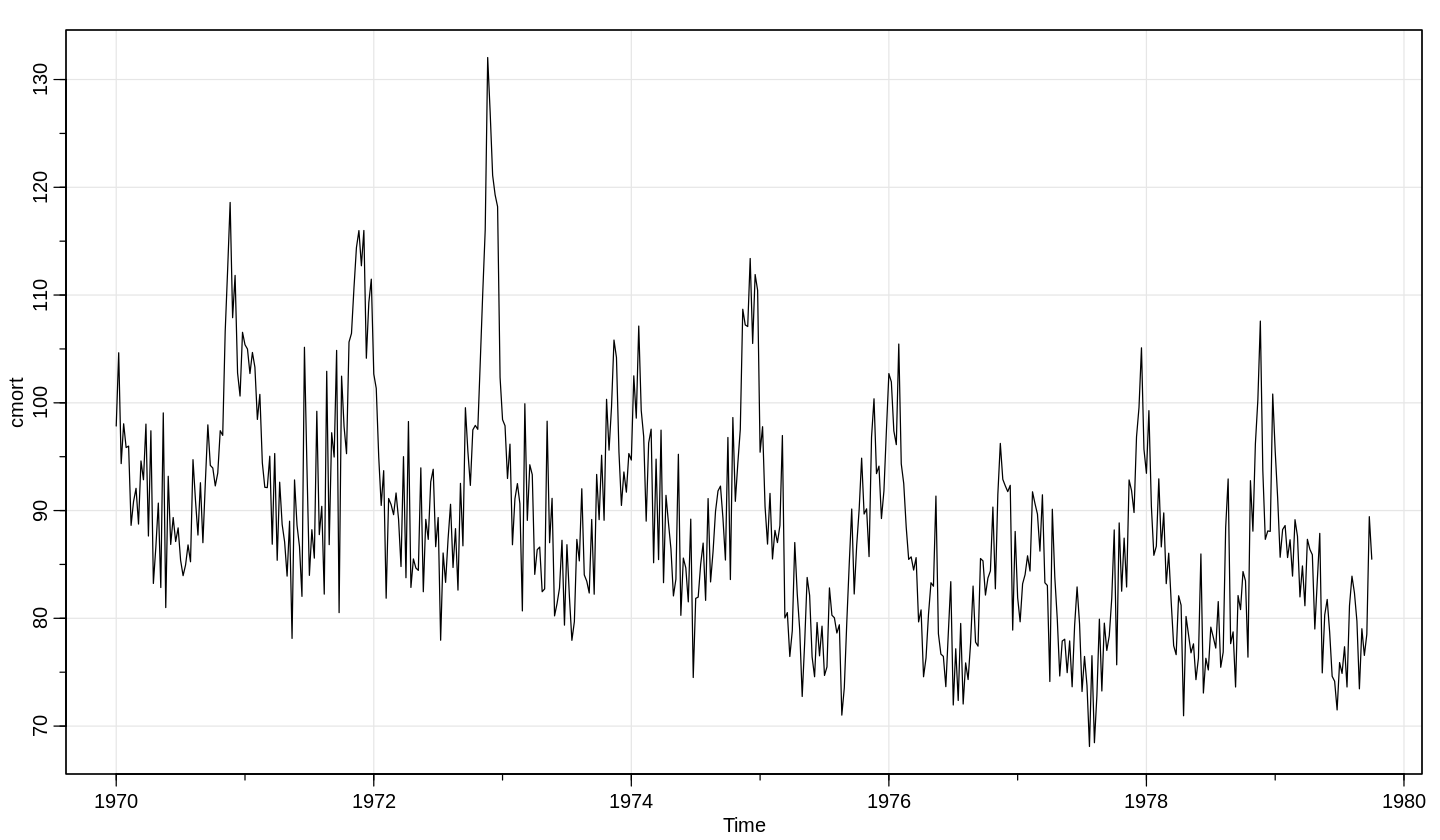

In [31]:
tsplot(cmort)